In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import random



class MyClassifier_25:  

    def __init__(self,dataset) -> None:
        self.w = None
        self.b = None
    
    def prepare_binary(self,dataset,class1:int,class2:int):

        #USAGE    
        # Since we have to deal with a binary classifier to diffrentiate between digits 7 and 1, 
        # we choose only those examples.
        # If asked to train a classifier on any other pair a, b (say),
        # please pass the right arguments to the following function as follows:
        # trainlabel, traindata, dataTargetDf = prepare_binary(a,b)


        # We now assign +1 to one class and -1 to the other;
        # Therefore +1 and -1 will be the new labels
        trainlabel = dataset.loc[(dataset['label']== class1)  | (dataset['label']== class2) ]['label']
        trainlabel.loc[trainlabel == class1] = +1
        trainlabel.loc[trainlabel == class2] = -1
        trainlabel = trainlabel.to_numpy()
    
        #In order to match dimensions of "traindata" and "trainlabel", we convert trainlabel to two dimension array
        trainlabel= np.reshape(trainlabel, (trainlabel.shape[0],1))   

        # We now extract the features for the two classes
        traindata = dataset.loc[(dataset['label']== class1)  | (dataset['label']== class2) ]
        traindata = traindata.drop(labels = ["label"],axis = 1).to_numpy()
        
        # Also creating a dataframe with these, so that we can randomize the order of the train data when needed without
        # losing the mapping between feature vectors and the target labels
        trainDf=pd.DataFrame(traindata)
        targetDf=pd.DataFrame(trainlabel,columns=['target'])
        dataTargetDf = pd.concat([trainDf, targetDf[['target']]], axis = 1)


        ##If randomizing the order, should we use the dataframe 'finalDf'?
        return trainlabel, traindata, dataTargetDf

    def subset(dataTargetDf, subsetfrac:float):
        
        # Usage: If 20% of the data is to be randomly selected
        # subsetDf = subset(dataTargetDf, 0.2)
        
        return dataTargetDf.sample(frac = subsetfrac)

    def sample_selection(self,training_sample):

        pass

    def dependency(self,B,U):
    #     We first calculate the positive set using B attrubutes
        for x in traindata:
            POS_B = f(x)>0

    #     Following 2 lines are for calculating no. of elements in multi-dimensional array
    #     size = 1
    #     for dim in np.shape(a): size *= dim

    #     Dependency is the ratio of consistent objects
    #     In other words its the cardinality of set A divided by cardinality of set B
    #     (Cardinality of a set is the number of elements in it)
    #     dependency = num of elements in POS_B / num of elements in U
        return num_of_ele_POS_B / num_of_ele_U

    def train(self,traindata,trainlabel):
        
        #USAGE
        # W, w = train(traindata, trainlabel)

        # m: Number of feature vectors
        # W and w: Weight vector and Bias value respectively
        m = traindata.shape[1]
        W = cp.Variable((m,1))
        w = cp.Variable()

        
        # Equation for the regularizer.
        # It is the lambda*(norm2 of W)**2
        # Here "lambda" is a non negative constant
        lambd = cp.Parameter(nonneg=True)

        ## Ideally we will have to try using different values fro "lambda"
        ## For the sake of testing the code, we have set it to 0.01
        ## Do we need to have a lambda?
        lambd = 0.01 
        reg_loss = cp.norm(W,p=2)**2
        
        #hinge loss
        hinge_loss = cp.sum(cp.pos(1-cp.multiply(trainlabel,traindata @ W + w)))
        
        #Constraint
        # For every feature vector traindata[i] and its corresponding label trainlabel[i]:
        # W^T*traindata[i] + w >= 1
        const = [trainlabel[i]*(traindata[i]@ W + w) >= 1 for i in range(traindata.shape[0])]
        ##Check the dimensions in the above constraint equation
        
        #Objective is to minimize reg_loss and hinge_loss
        objective_func = cp.Minimize(hinge_loss/m + lambd*reg_loss)
    
        # Now framing the LP, along with the constraints
        prob = cp.Problem(objective_func,constraints=const)

        prob.solve()
        
        # Solving the problem would give us the optimal values from W and w;
        # which have to be returned, so that we can use them while testing

        ## adding to class variable
        self.w = W
        self.b = w
        return W, w

    def f(self,test_input):
        test_val = test_input.dot(self.w.value) +  self.b.value
        return test_value

    def test(self):
        pass

In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

mnist_train = pd.read_csv("train.csv")
#Take copies of the master dataframes

train = mnist_train.copy()

In [4]:
my_clf = MyClassifier_25(train)

In [7]:
mnist_train.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [18]:
train_7 = train.loc[train['label'] == 7]
train_1 = train.loc[train['label'] == 1]
train = train.loc[train['label'].isin([1,7])]

In [19]:
train.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
12         1       0       0       0       0       0       0       0       0   
15         1       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41980      7       0       0       0       0       0       0       0       0   
41983      7       0       0       0       0       0       0       0       0   
41991      1       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   

       pi

In [20]:
#We will use TSNE to reduce the datset down to 2 Dimensions and then plot it using Matplotlib
from sklearn.manifold import TSNE
import time
tsne = TSNE(n_components = 2, random_state = 42)
t0 = time.time()
train_1_reduced = tsne.fit_transform(train)
t1 = time.time()

t1-t0

112.1709098815918

In [ ]:
train_single = 

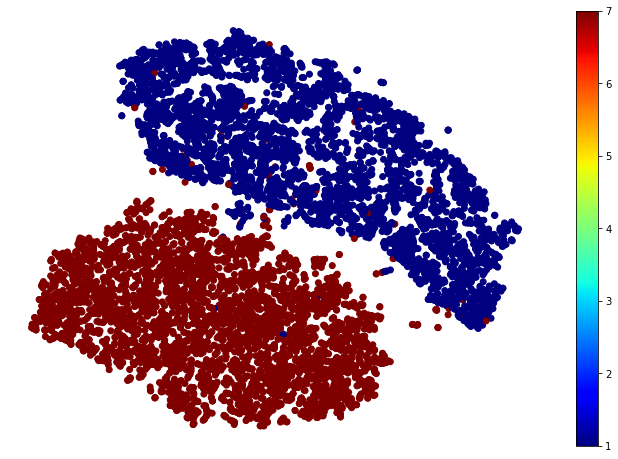

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(train_1_reduced[:,0], train_1_reduced[:,1], c = train['label'], cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()